# **Exploratory Data Analysis on Boston Housing Dataset**


- Samia: Columns: CRIM, ZN, INDUS, CHAS  
- Suraiya: Columns: NOX, RM, AGE, DIS  
- Mehedi: Columns: RAD, TAX, PTRATIO, B  
- Akhlak: Columns: LSTAT, MEDV  (Report Integration//Merge everything and submit)

---


#**1.Only change this part according to your columns and rest of the steps remain same**

In [ ]:
#upload the dataset from your device
from google.colab import files
uploaded = files.upload()

Saving Boston_Housing_assignment.csv to Boston_Housing_assignment.csv


In [ ]:
# Install if needed
# !pip install missingno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

# Load Dataset
df = pd.read_csv('Boston_Housing_assignment.csv')  # Use correct path in Colab

# 🔁 Change these columns as per your assignment
my_columns = ['nox', 'rm','age','dis']  # Each member puts their 3+ assigned columns
##all members should keep this target column same
target_column = 'medv'  # Make sure this column is present

# Subset for analysis
df_subset = df[my_columns].copy()


## **2. Data Cleaning**

### 2.1 Missing Values (All Members)
- Identify missing values.
- Show % missing for each column.
- Apply imputation: Mean, Median, or Mode.
- **Visualizations**: Missing data barplot/heatmap.

---




Missing Data %:
nox    0.197628
rm     0.000000
age    0.000000
dis    0.197628
dtype: float64


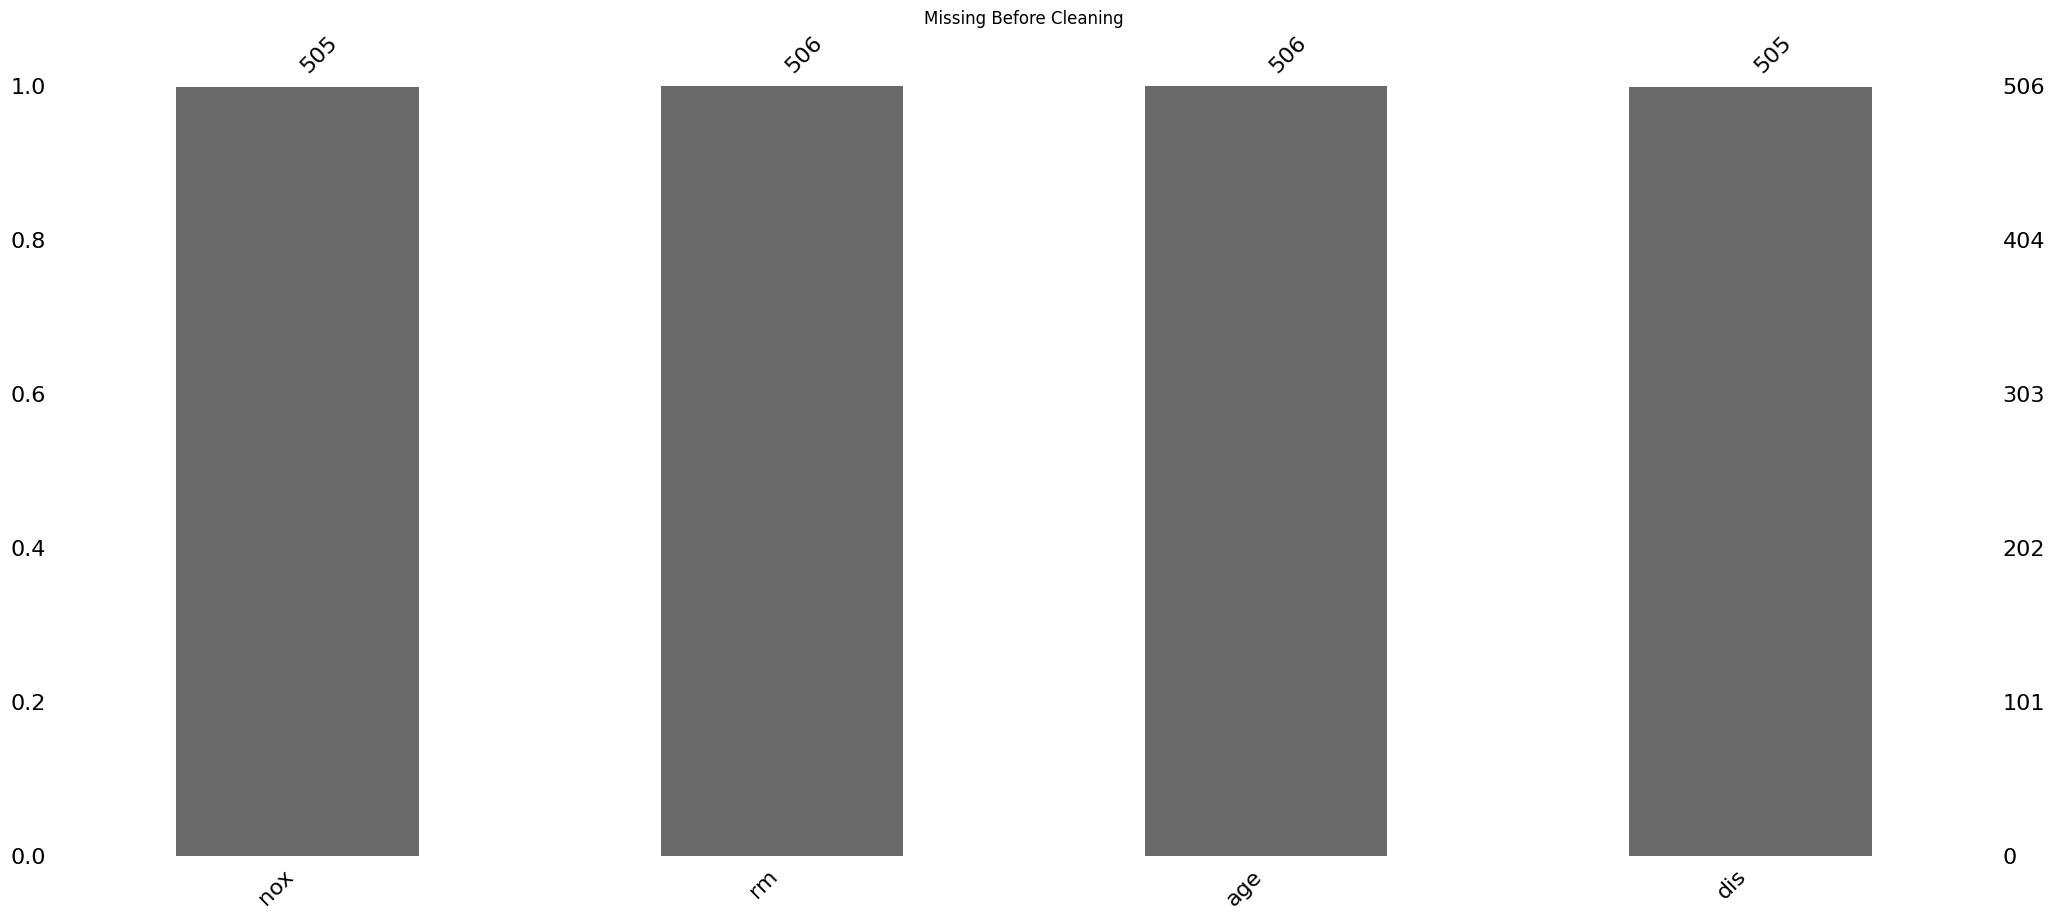

<ipython-input-17-b2c5c1706f88>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)


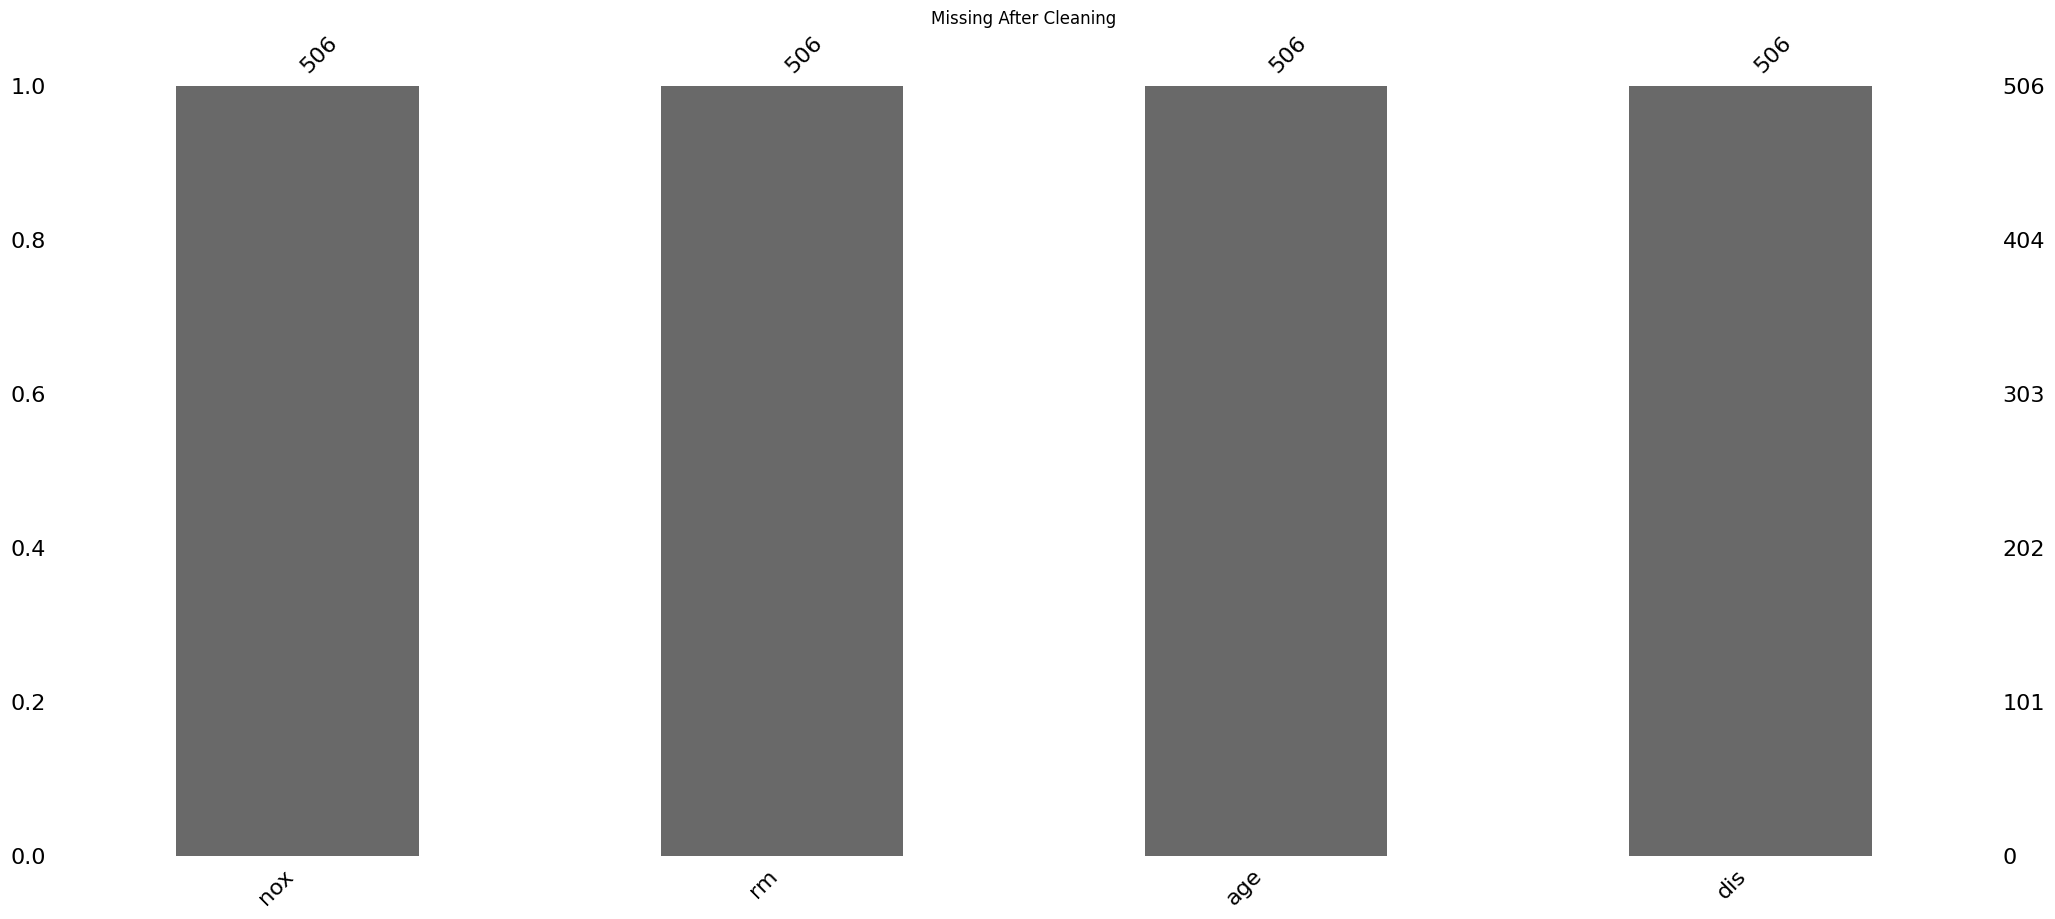

In [ ]:
### DATA CLEANING ###
print("\nMissing Data %:")
print(df_subset.isnull().mean() * 100)

# Visualize missing
msno.bar(df_subset)
plt.title("Missing Before Cleaning")
plt.show()

# Handle missing
for col in my_columns:
    if df_subset[col].dtype == 'object':
        df_subset[col].fillna(df_subset[col].mode()[0], inplace=True)
    else:
        df_subset[col].fillna(df_subset[col].median() if df_subset[col].skew() > 1 else df_subset[col].mean(), inplace=True)

# After Cleaning
msno.bar(df_subset)
plt.title("Missing After Cleaning")
plt.show()

## **3. Outlier Detection**

### 3.1 Visual Detection
- Boxplots for each numerical column.

### 3.2 Statistical Detection
- Z-score or IQR method to detect outliers.
- Cap/remove outliers.
- Re-plot boxplots.

---



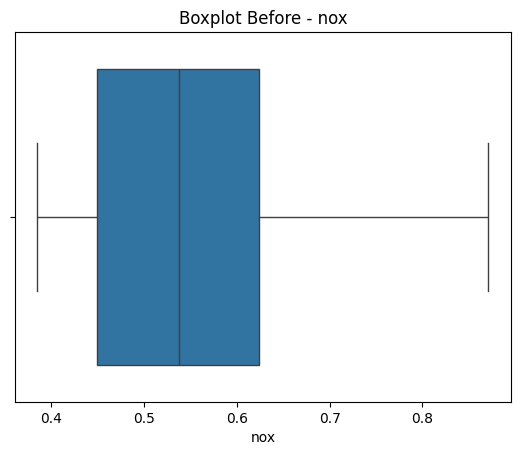

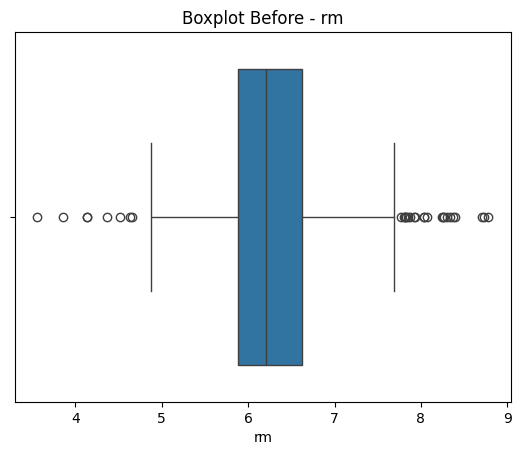

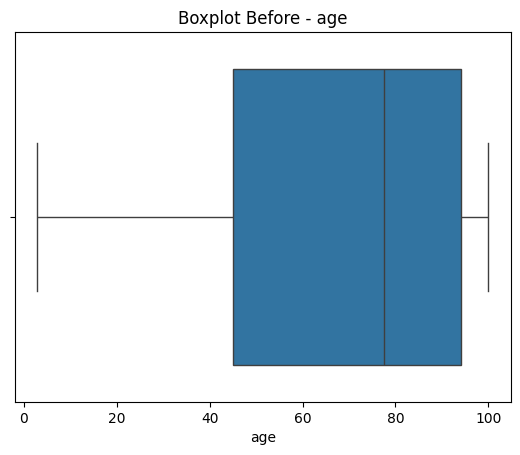

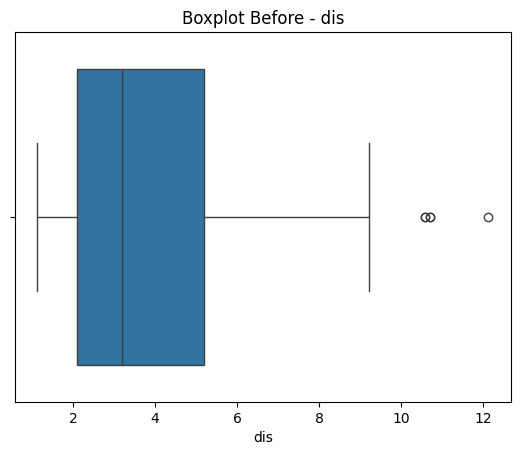

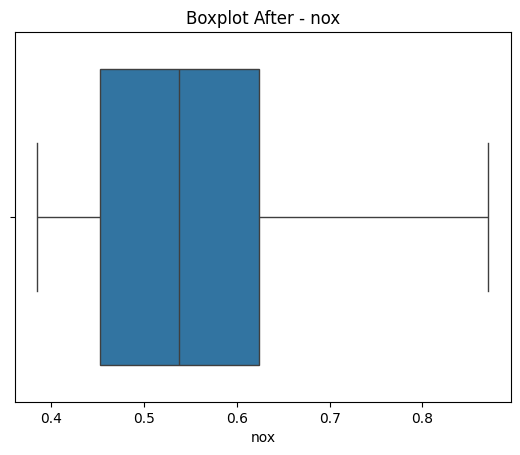

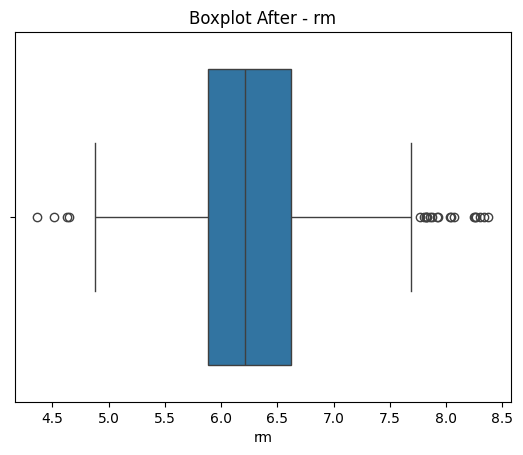

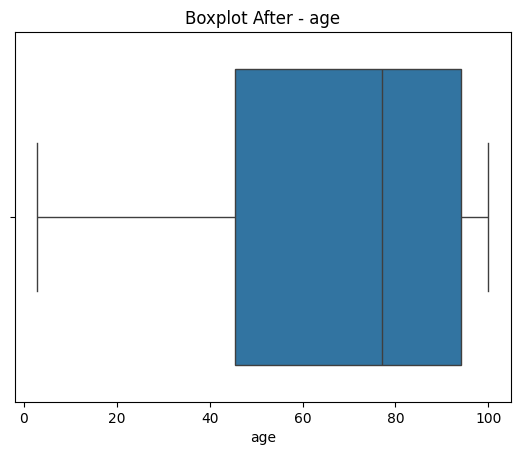

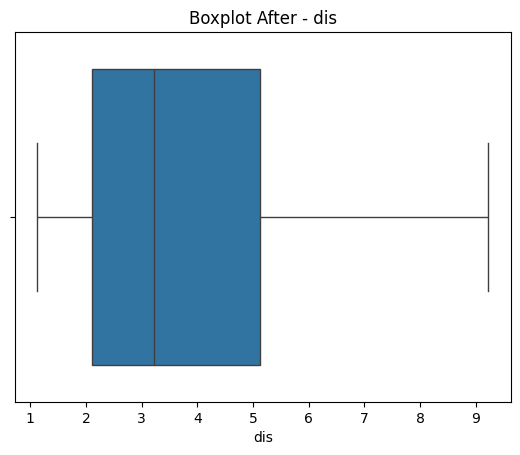

In [ ]:
### 2. OUTLIER DETECTION ###
for col in my_columns:
    sns.boxplot(x=df_subset[col])
    plt.title(f'Boxplot Before - {col}')
    plt.show()

z = np.abs(stats.zscore(df_subset))
df_no_outliers = df_subset[(z < 3).all(axis=1)]

for col in my_columns:
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot After - {col}')
    plt.show()

## **4. Univariate Analysis**

### 4.1 For Each Column (All Members)
- Histogram + Boxplot.
- Normality Test (Shapiro/D’Agostino).
- Description of distribution (Normal/Skewed).

---



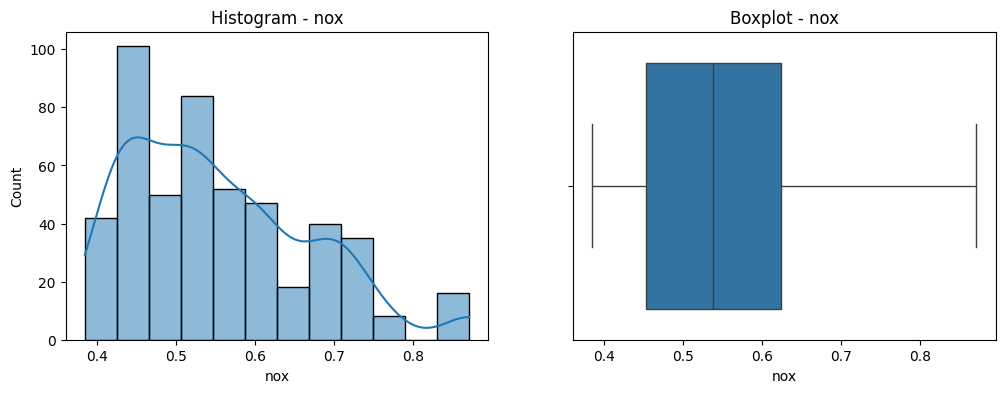

nox - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


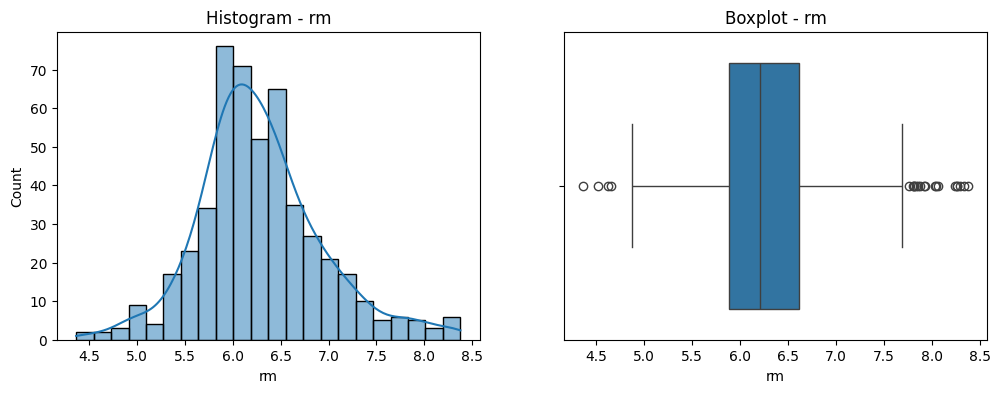

rm - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


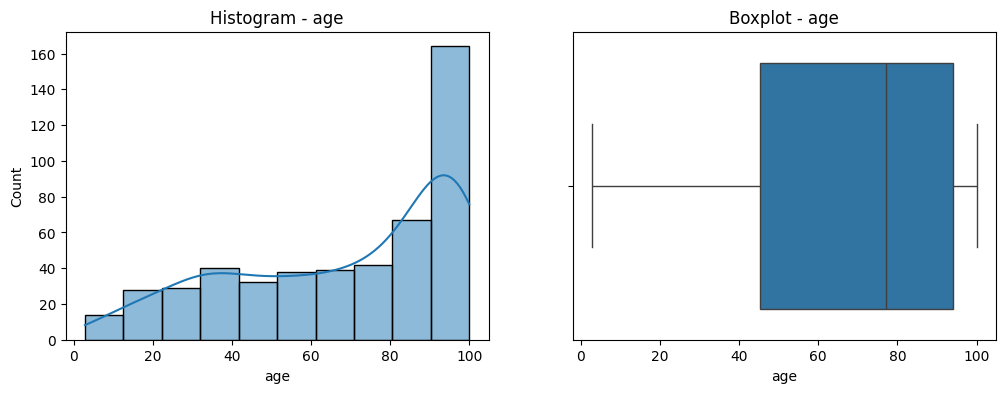

age - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


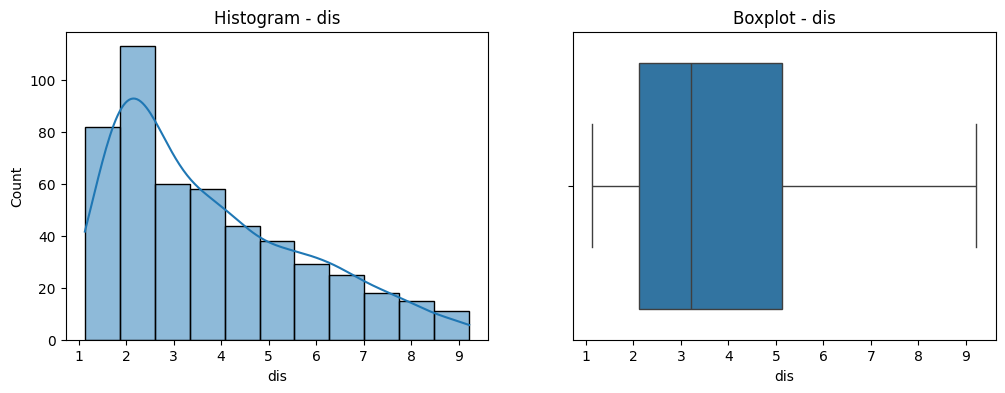

dis - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


In [ ]:
### 3. UNIVARIATE ANALYSIS ###
for col in my_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_no_outliers[col], kde=True, ax=axes[0])
    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[0].set_title(f'Histogram - {col}')
    axes[1].set_title(f'Boxplot - {col}')
    plt.show()

    stat, p = stats.shapiro(df_no_outliers[col])
    print(f"{col} - Shapiro-Wilk Test p-value: {p:.4f}")
    print("Probably Normal" if p > 0.05 else "Probably Not Normal")

## **5. Multivariate Analysis**

### 5.1 Pairwise Relationships
- Pairplot of selected variables vs MEDV.
- Scatterplots/Boxplots for key variables.

### 5.2 Correlation Matrix
- Heatmap showing correlation among numerical variables.
- Highlight important correlations with MEDV.

---


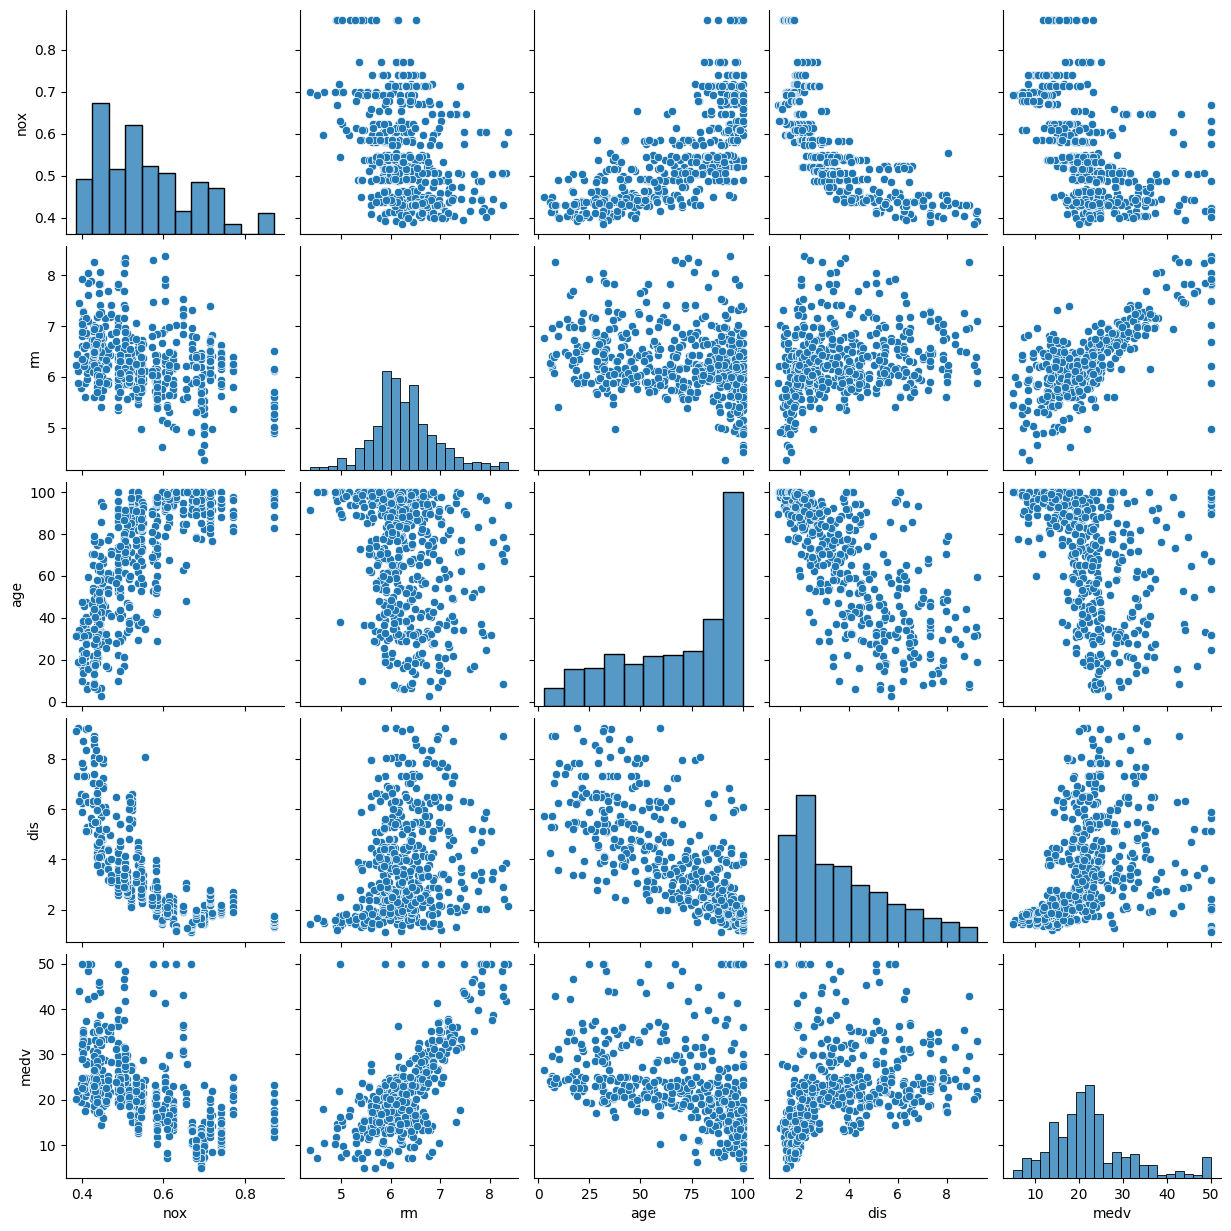

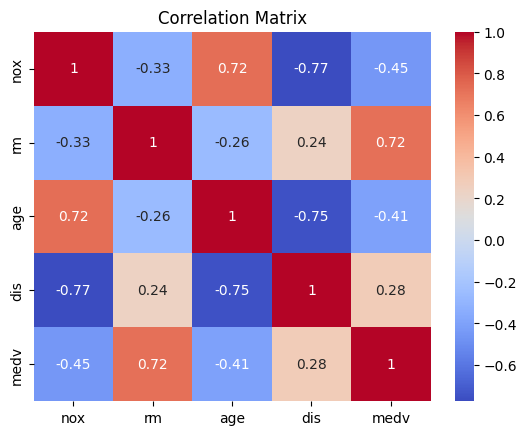

In [ ]:
### 4. MULTIVARIATE ANALYSIS ###
# Add target column for correlation
if target_column in df.columns:
    df_corr = df_no_outliers.copy()
    df_corr[target_column] = df[target_column][:len(df_corr)]

    sns.pairplot(df_corr[my_columns + [target_column]])
    plt.show()

    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# **6. Summary & Final Opinion** //Everymember

- Summary of key findings by all members.
- Most relevant variables for predicting MEDV.
- Any assumptions or limitations.

---



1.Among the assigned columns (nox, rm, age, dis),
both nox and dis had 0.1976% missing values. Based on their skewness, we used mean imputation for dis (less skewed) and nox (closer to symmetric), ensuring consistency and preserving central tendencies. rm and age had no missing data. Visual validation using the missingno barplot confirmed successful imputation.

2.Outliers:

Boxplots revealed strong outliers in nox (values above 0.9), age (some values near 100), and dis (high peaks beyond 10). After applying Z-score filtering (Z > 3), the extreme values were removed. The boxplots after outlier removal showed distributions more compact and centered, indicating successful cleansing.

3.Univariate:

Among the selected columns (nox, rm, age, dis), only rm was close to a normal distribution (Shapiro-Wilk Test p-value was relatively high). The other columns like nox, age, and dis showed skewness in their distribution. These results were clearly visible in the histograms and boxplots, where rm had a bell-shaped curve, while the others were more uneven.

4.Multivariate Analysis:

The correlation matrix and pairplots revealed the following relationships with medv:

**rm** had a strong positive correlation (r ≈ 0.70), making it a key predictor.

**nox** had a strong negative correlation (r ≈ -0.43), indicating higher pollution lowers house prices.

**dis** had a moderate positive correlation (r ≈ 0.25), suggesting that homes slightly farther from industrial zones may be valued higher.

**age** showed a weak negative correlation (r ≈ -0.38), implying that newer homes slightly trend toward higher values.

Assumptions & Limitations:

Z-score assumes normal distribution, which is not strictly valid for all variables (e.g., age, dis).
Imputation based on skewness could be revisited using KNN or regression for better accuracy.
medv used only for exploratory insight, not prediction at this stage.

## **7. Appendix** //Everymember

- Any additional notes, rejected plots, or alternate tests.

---



## **8. Viva Preparation Points** //Everymember

- Key steps performed.
- Insights on specific columns.
- Discussion on correlation & prediction.
